# Perfume Designer Notes Analysis 🧴

## Objective
This project explores fragrance note compositions used by **designer perfume brands**.
The analysis focuses on:
- Most frequently used notes
- Differences across gender (Men, Women, Unisex)
- Signature top, middle, and base notes for each designer brand

The goal is to translate complex fragrance data into insights that are easy to understand for a general audience.


## Introduction

Perfume composition is built around layers of scent notes that unfold over time:
top notes create the first impression, middle notes define the character, and base notes provide depth and longevity.

This project analyzes perfume note compositions across **designer brands**, focusing on how different notes are used by **gender category (men, women, unisex)** and how brands develop their **signature scent profiles**.


## Dataset Overview

The dataset contains information on perfumes including brand, release year, gender category, and categorized scent notes (top, middle, base).

**Key fields used in this analysis:**
- Brand
- Gender
- Top Notes
- Middle Notes
- Base Notes
- Year

The data was cleaned and standardized to ensure consistency across note naming and missing values.


## Data Cleaning & Preparation

Several preprocessing steps were applied:
- Standardized note naming conventions
- Filtered the dataset to include **designer brands only**
- Split notes into individual components for analysis


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

sns.set_theme(style="whitegrid")


In [70]:
BASE_DIR = Path.cwd().parent
DATA_DIR = BASE_DIR / "data"
IMAGE_DIR = BASE_DIR / "images"
df = pd.read_csv(DATA_DIR / "fragrantica.csv", encoding="latin1", sep=";")
df.head()


,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5
0,https://www.fragrantica.com/perfume/xerjoff/ac...,accento-overdose-pride-edition,xerjoff,Italy,unisex,"1,42",201,2022.0,"fruity notes, aldehydes, green notes","bulgarian rose, egyptian jasmine, lily-of-the-...","eucalyptus, pine",unknown,NaN,rose,woody,fruity,aromatic,floral
1,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2024,jean-paul-gaultier,France,women,"1,86",70,2024.0,"yuzu, citruses","orange blossom, neroli","musk, blonde woods",unknown,NaN,citrus,white floral,sweet,fresh,musky
2,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2023,jean-paul-gaultier,France,unisex,"1,91",285,2023.0,"blood orange, yuzu","neroli, orange blossom","musk, white woods",natalie gracia-cetto,quentin bisch,citrus,white floral,sweet,fresh spicy,musky
3,https://www.fragrantica.com/perfume/bruno-bana...,pride-edition-man,bruno-banani,Germany,men,"1,92",59,2019.0,"guarana, grapefruit, red apple","walnut, lavender, guava","vetiver, benzoin, amber",unknown,NaN,fruity,nutty,woody,tropical,NaN
4,https://www.fragrantica.com/perfume/jean-paul-...,le-male-pride-collector,jean-paul-gaultier,France,men,"1,93",632,2020.0,"mint, lavender, cardamom, artemisia, bergamot","caraway, cinnamon, orange blossom","vanilla, sandalwood, amber, cedar, tonka bean",francis kurkdjian,NaN,aromatic,warm spicy,fresh spicy,cinnamon,vanilla


## Dataset Overview


In [4]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24063 entries, 0 to 24062
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           24063 non-null  object 
 1   Perfume       24063 non-null  object 
 2   Brand         24063 non-null  object 
 3   Country       24063 non-null  object 
 4   Gender        24063 non-null  object 
 5   Rating Value  24063 non-null  object 
 6   Rating Count  24063 non-null  int64  
 7   Year          22026 non-null  float64
 8   Top           24063 non-null  object 
 9   Middle        24063 non-null  object 
 10  Base          24063 non-null  object 
 11  Perfumer1     24063 non-null  object 
 12  Perfumer2     1336 non-null   object 
 13  mainaccord1   24063 non-null  object 
 14  mainaccord2   24050 non-null  object 
 15  mainaccord3   23949 non-null  object 
 16  mainaccord4   23675 non-null  object 
 17  mainaccord5   23082 non-null  object 
dtypes: float64(1), int64(1), o

url                 0
Perfume             0
Brand               0
Country             0
Gender              0
Rating Value        0
Rating Count        0
Year             2037
Top                 0
Middle              0
Base                0
Perfumer1           0
Perfumer2       22727
mainaccord1         0
mainaccord2        13
mainaccord3       114
mainaccord4       388
mainaccord5       981
dtype: int64

In [5]:
df = df.rename(columns={
    "Top": "top_notes",
    "Middle": "middle_notes",
    "Base": "base_notes"
})


In [6]:
DESIGNER_BRANDS = [
    "dior", "chanel", "gucci", "versace", "prada","giorgio-armani",
    "yves-saint-laurent", "burberry", "calvin-klein",
    "armani", "dolce-gabbana"
]

df_designer = df[df["Brand"].isin(DESIGNER_BRANDS)].copy()


In [7]:
df_designer["Brand"].value_counts()


Brand
yves-saint-laurent    197
dior                  196
giorgio-armani        185
calvin-klein          176
dolce-gabbana         104
chanel                100
gucci                  98
burberry               85
versace                64
prada                  63
Name: count, dtype: int64

In [8]:
def explode_notes(df, column):
    exploded = (
        df[column]
        .dropna()
        .astype(str)
        .str.split(",")
        .explode()
        .str.strip()
    )

    note_count = exploded.value_counts().reset_index()
    note_count.columns = ["note", "count"]

    return note_count


In [9]:
note_color_map = {
    # Citrus / Fresh
    "bergamot": "#F4D35E",
    "lemon": "#FFF275",
    "orange": "#FFA552",
    "grapefruit": "#FF9F1C",
    "mandarin orange": "#FFB703",   # citrus sweet orange
    "coriander": "#9BBF8A",    
    # Green / Aromatic
    "green notes": "#7FB069",
    "mint": "#5BC0BE",
    "basil": "#6B8E23",

    # Floral (light)
    "neroli": "#FFE5EC",
    "lavender": "#C3B1E1",
    "jasmine": "#F6C1CC",

    # Fruity
    "apple": "#D62828",
    "pear": "#A7C957",
    "peach": "#FFB5A7",

    # Spicy (light)
    "pepper": "#3A3A3A",
    "ginger": "#D98E04",
    # Floral
    "rose": "#E8A0BF",
    "jasmine": "#F6C1CC",
    "ylang-ylang": "#FFD966",
    "lavender": "#C3B1E1",
    "iris": "#D8CBEF",

    # Spicy
    "cinnamon": "#C65D3B",
    "nutmeg": "#A97142",
    "cardamom": "#6B8E23",
    "pepper": "#2F2F2F",

    # Woody
    "cedar": "#8B6B4A",
    "sandalwood": "#D2B48C",
    "vetiver": "#556B2F",
    "patchouli": "#5B3A29",

    # Sweet / Gourmand
    "vanilla": "#F3E5AB",
    "caramel": "#C68642",
    "tonka bean": "#B08968",

    # Musky / Powdery
    "musk": "#DADADA",
    "amber": "#FFBF00",
    # Woody
    "oud": "#2B1B17",
    "agarwood": "#3A2F2A",
    "sandalwood": "#C2A878",
    "cedar": "#8B6B4A",
    "vetiver": "#556B2F",
    "patchouli": "#4B3621",

    # Amber / Resin
    "amber": "#FFB000",
    "benzoin": "#7A4A2E",
    "labdanum": "#5A3E2B",

    # Musky
    "musk": "#D0D0D0",
    "white musk": "#ECECEC",

    # Sweet / Gourmand
    "vanilla": "#F3E5AB",
    "tonka bean": "#B08968",
    "aldehydes": "#E6E6E6",    # clean, airy, soapy
    "pink pepper": "#E63946"

}
default_palette = sns.color_palette("crest", 10)


## Top Notes by Gender


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
genders = ["men", "women", "unisex"]

for ax, gender in zip(axes, genders):
    temp = df_designer[df_designer["Gender"] == gender]
    top_notes = explode_notes(temp, "top_notes").head(10)

    colors = {
        note: note_color_map.get(note.lower(), "#A0A0A0")
        for note in top_notes["note"]
    }

    sns.barplot(
        data=top_notes,
        x="count",
        y="note",
        hue="note",
        palette=colors,
        dodge=False,
        legend=False,
        ax=ax
    )

    ax.set_title(f"Top Notes – {gender.title()}")
    ax.set_xlabel("Count")
    ax.set_ylabel("Notes")
    ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()

file_path = IMAGE_DIR / "top_notes_by_gender.png"
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.close()

print(f"Plot saved to {file_path}")

Plot saved to c:\Python\Python311\repo\perfume-notes-analysis\images\top_notes_by_gender.png


## Middle Notes by Gender


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
genders = ["men", "women", "unisex"]

for ax, gender in zip(axes, genders):
    temp = df_designer[df_designer["Gender"] == gender]
    middle_notes = explode_notes(temp, "middle_notes").head(10)

    colors = {
        note: note_color_map.get(note.lower(), "#A0A0A0")
        for note in middle_notes["note"]
    }

    sns.barplot(
        data=middle_notes,
        x="count",
        y="note",
        hue="note",
        palette=colors,
        dodge=False,
        legend=False,
        ax=ax
    )

    ax.set_title(f"Middle Notes – {gender.title()}")
    ax.set_xlabel("Count")
    ax.set_ylabel("Notes")
    ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
file_path = IMAGE_DIR / "middle_notes_by_gender.png"
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()


## Base Notes by Gender


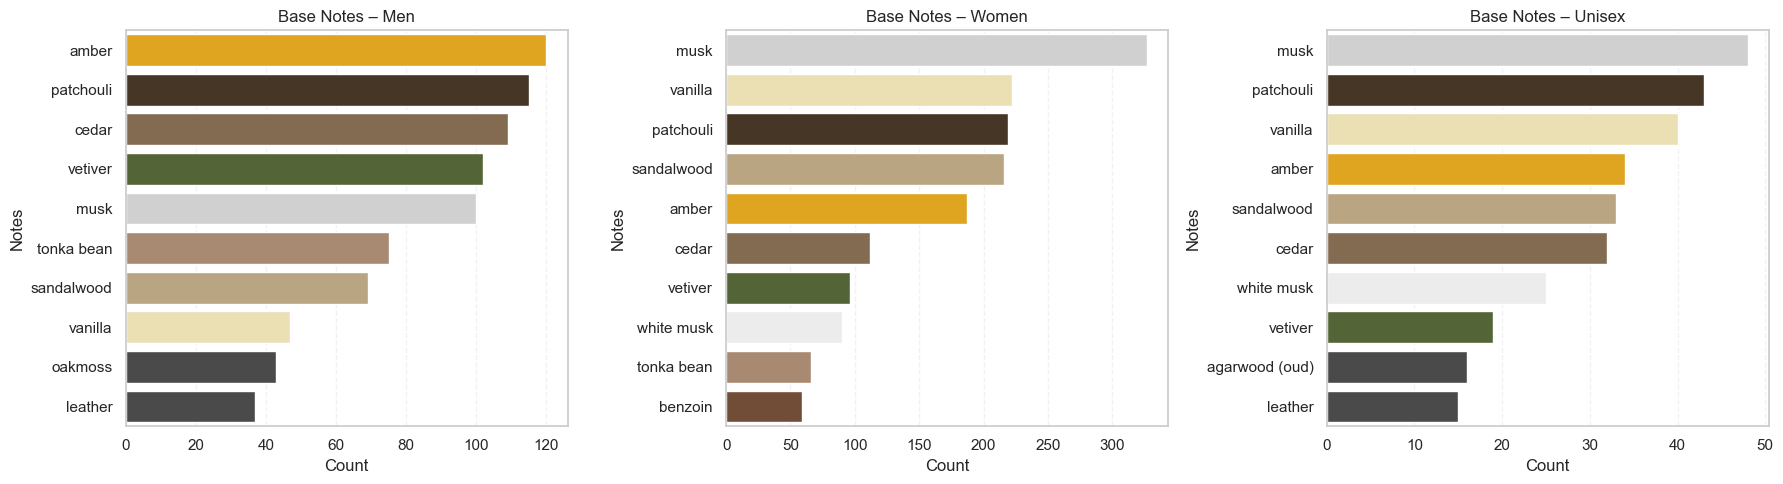

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
genders = ["men", "women", "unisex"]

for ax, gender in zip(axes, genders):
    temp = df_designer[df_designer["Gender"] == gender]
    base_notes = explode_notes(temp, "base_notes").head(10)

    colors = {
        note: note_color_map.get(note.lower(), "#4A4A4A")
        for note in base_notes["note"]
    }

    sns.barplot(
        data=base_notes,
        x="count",
        y="note",
        hue="note",
        palette=colors,
        dodge=False,
        legend=False,
        ax=ax
    )

    ax.set_title(f"Base Notes – {gender.title()}")
    ax.set_xlabel("Count")
    ax.set_ylabel("Notes")
    ax.grid(axis="x", linestyle="--", alpha=0.25)

plt.tight_layout()
file_path = IMAGE_DIR / "base_notes_by_gender.png"
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()


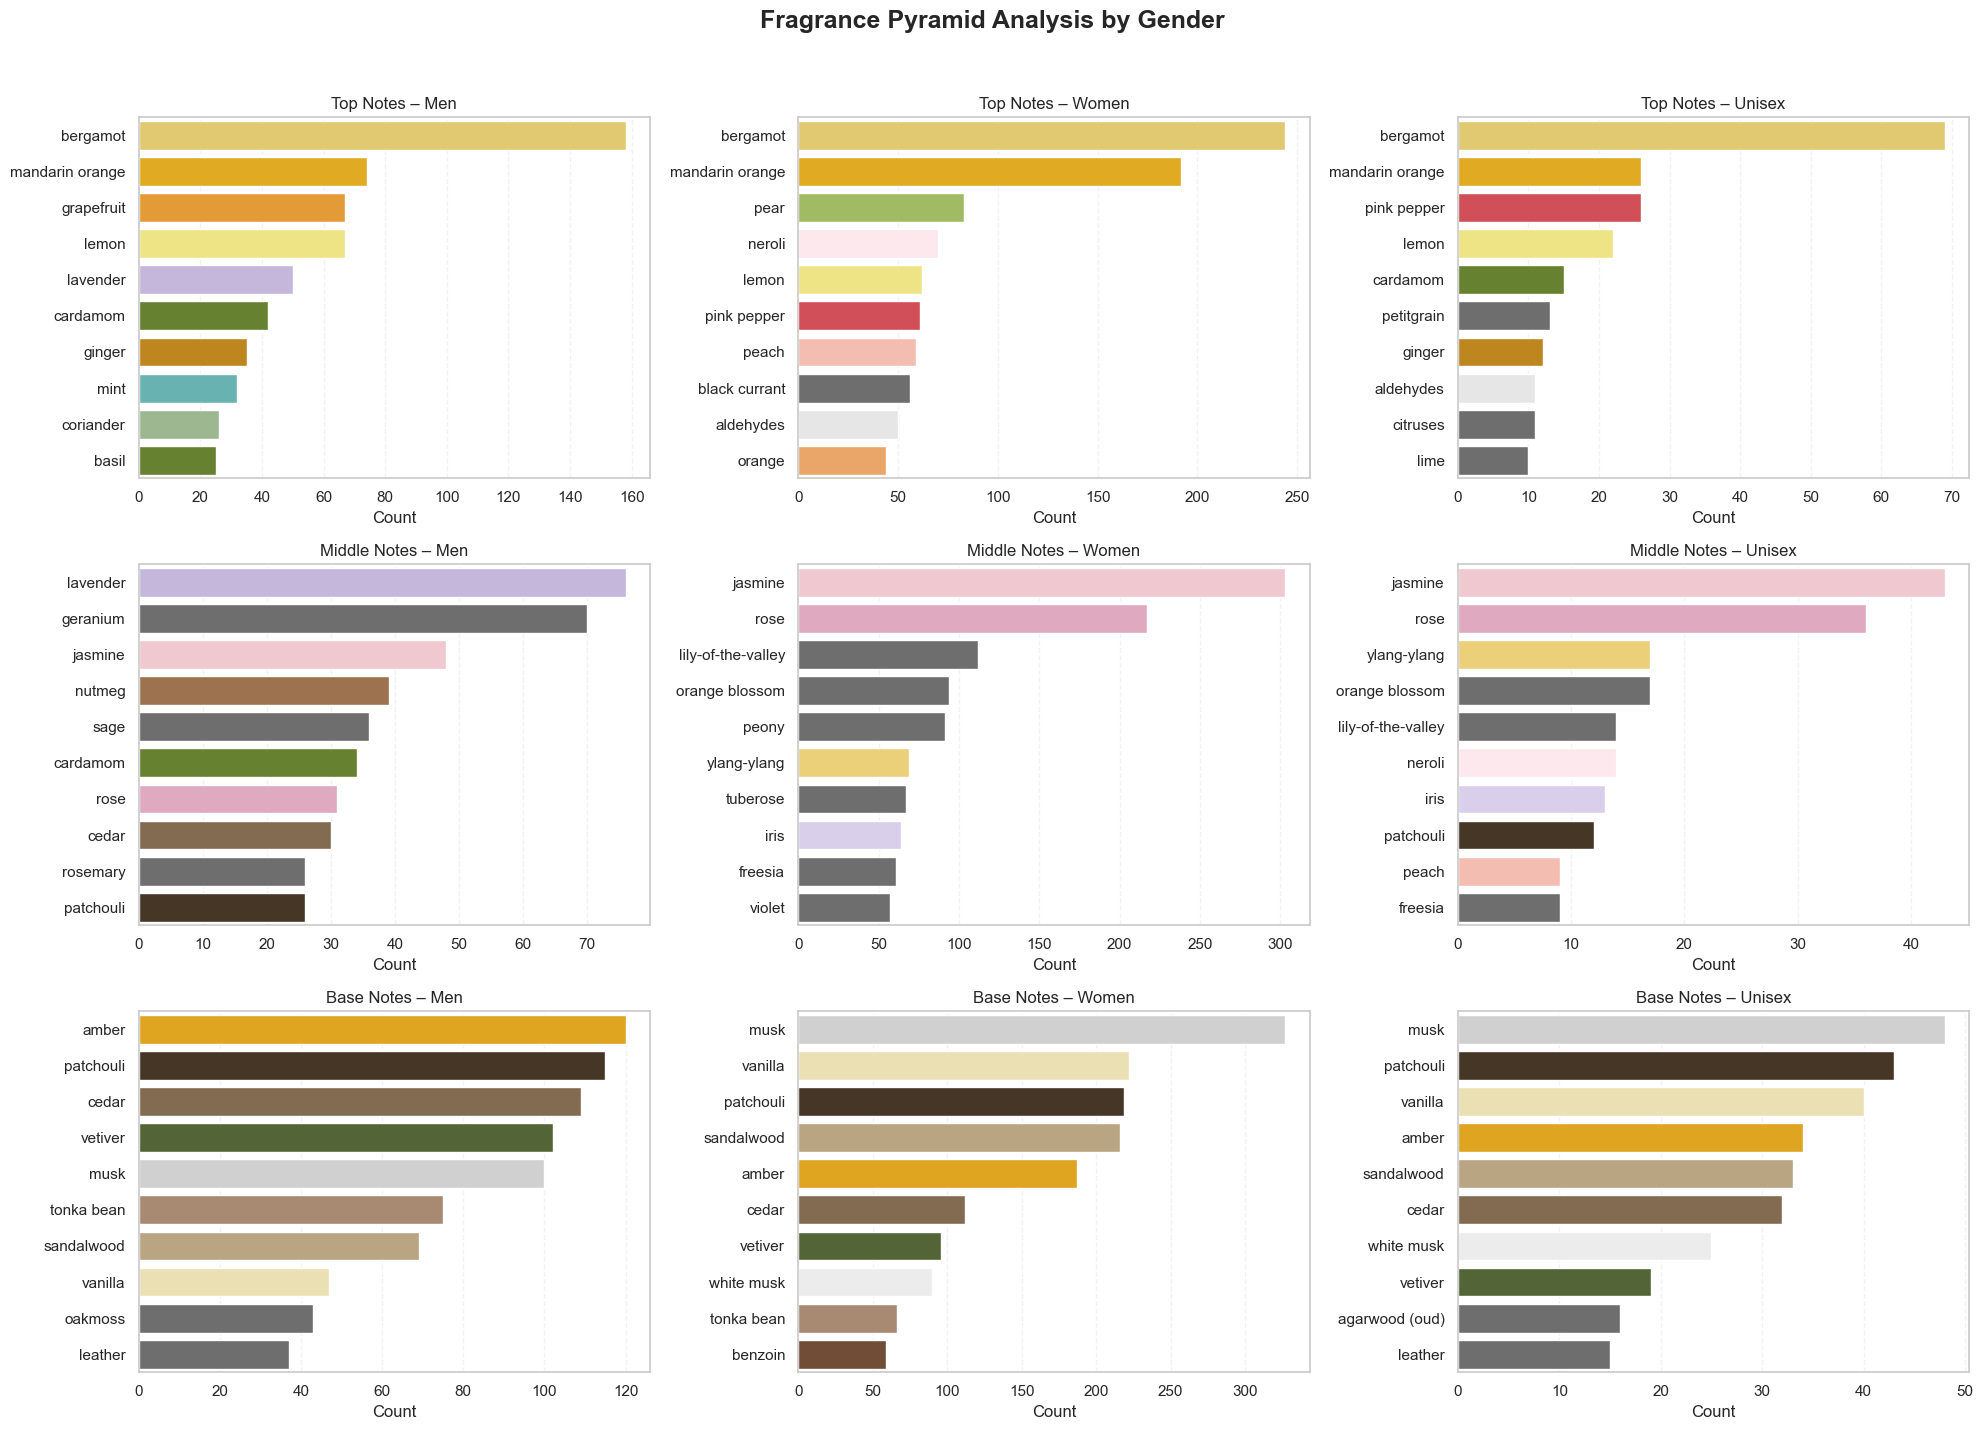

In [75]:
fig, axes = plt.subplots(3, 3, figsize=(20, 14))
layers = ["top_notes", "middle_notes", "base_notes"]
layer_titles = ["Top Notes", "Middle Notes", "Base Notes"]
genders = ["men", "women", "unisex"]

for row, (layer, layer_title) in enumerate(zip(layers, layer_titles)):
    for col, gender in enumerate(genders):
        ax = axes[row, col]
        temp = df_designer[df_designer["Gender"] == gender]
        notes = explode_notes(temp, layer).head(10)

        colors = {
            note: note_color_map.get(note.lower(), "#6E6E6E")
            for note in notes["note"]
        }

        sns.barplot(
            data=notes,
            x="count",
            y="note",
            hue="note",
            palette=colors,
            dodge=False,
            legend=False,
            ax=ax
        )

        ax.set_title(f"{layer_title} – {gender.title()}")
        ax.set_xlabel("Count")
        ax.set_ylabel("")
        ax.grid(axis="x", linestyle="--", alpha=0.25)

plt.suptitle(
    "Fragrance Pyramid Analysis by Gender",
    fontsize=18,
    fontweight="bold",
    y=1.02
)

plt.tight_layout()
file_path = IMAGE_DIR / "Fragrance Pyramid By Gender.png"
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()


### Overview
This analysis explores fragrance composition by examining the distribution of top, middle, and base notes across men, women, and unisex perfumes. By structuring the results according to the fragrance pyramid, the visualization highlights how scent profiles evolve from initial impression to long-lasting dry-down.

#### 🍋 Top Notes Insight

Top notes are dominated by fresh citrus, green, and light fruity accords, particularly in men and unisex fragrances. These notes create a bright and energetic opening, emphasizing freshness and immediate appeal. Women’s fragrances show a slightly higher presence of soft floral and fruity notes, suggesting a smoother and more inviting introduction.

#### 🌸 Middle Notes Insight

Middle notes reveal the core character of each fragrance. Floral accords such as rose, jasmine, and lavender are more prominent in women’s perfumes, while men’s fragrances lean toward spicy and aromatic notes. Unisex fragrances show a balanced combination, indicating versatility and broader appeal.

#### 🪵 Base Notes Insight

Base notes are largely composed of woody, amber, and musky accords across all categories. Men’s and unisex fragrances strongly emphasize woody and resinous notes, contributing to depth and longevity. Women’s fragrances tend to incorporate warmer gourmand and musky elements, resulting in a softer yet enduring dry-down.

#### 📌 Key Takeaways

Overall, the fragrance pyramid analysis demonstrates clear differentiation by gender while highlighting the growing popularity of balanced, unisex compositions. The consistent use of woody and amber base notes across categories suggests a shared preference for long-lasting and warm scent profiles.

## Signature Scent by Fragrance Accord

This visualization presents the signature scent of each filtered designer brand based on their most frequent main accords.
Using the Spectral color palette helps highlight contrast between accords, making dominant and supporting scent characteristics clearly distinguishable across brands.


In [53]:
mainaccord_cols = [
    "mainaccord1",
    "mainaccord2",
    "mainaccord3",
    "mainaccord4",
    "mainaccord5"
]


In [54]:
def signature_scent_all_brands(df, top_n=5):
    # explode main accords
    temp = (
        df[["Brand"] + mainaccord_cols]
        .melt(id_vars="Brand", value_name="accord")
        .dropna()
    )

    # hitung frekuensi
    temp["accord"] = temp["accord"].str.lower()

    signature = (
        temp
        .groupby(["Brand", "accord"])
        .size()
        .reset_index(name="count")
    )

    # ambil top N accords per brand
    signature = (
        signature
        .sort_values(["Brand", "count"], ascending=[True, False])
        .groupby("Brand")
        .head(top_n)
        .reset_index(drop=True)
    )

    return signature


In [55]:
signature_scent = signature_scent_all_brands(df_designer, top_n=5)
signature_scent.head(10)


,Brand,accord,count
0,burberry,woody,52
1,burberry,citrus,39
2,burberry,aromatic,31
3,burberry,fruity,28
4,burberry,fresh spicy,25
5,calvin-klein,woody,96
6,calvin-klein,citrus,88
7,calvin-klein,aromatic,77
8,calvin-klein,floral,57
9,calvin-klein,fresh spicy,52


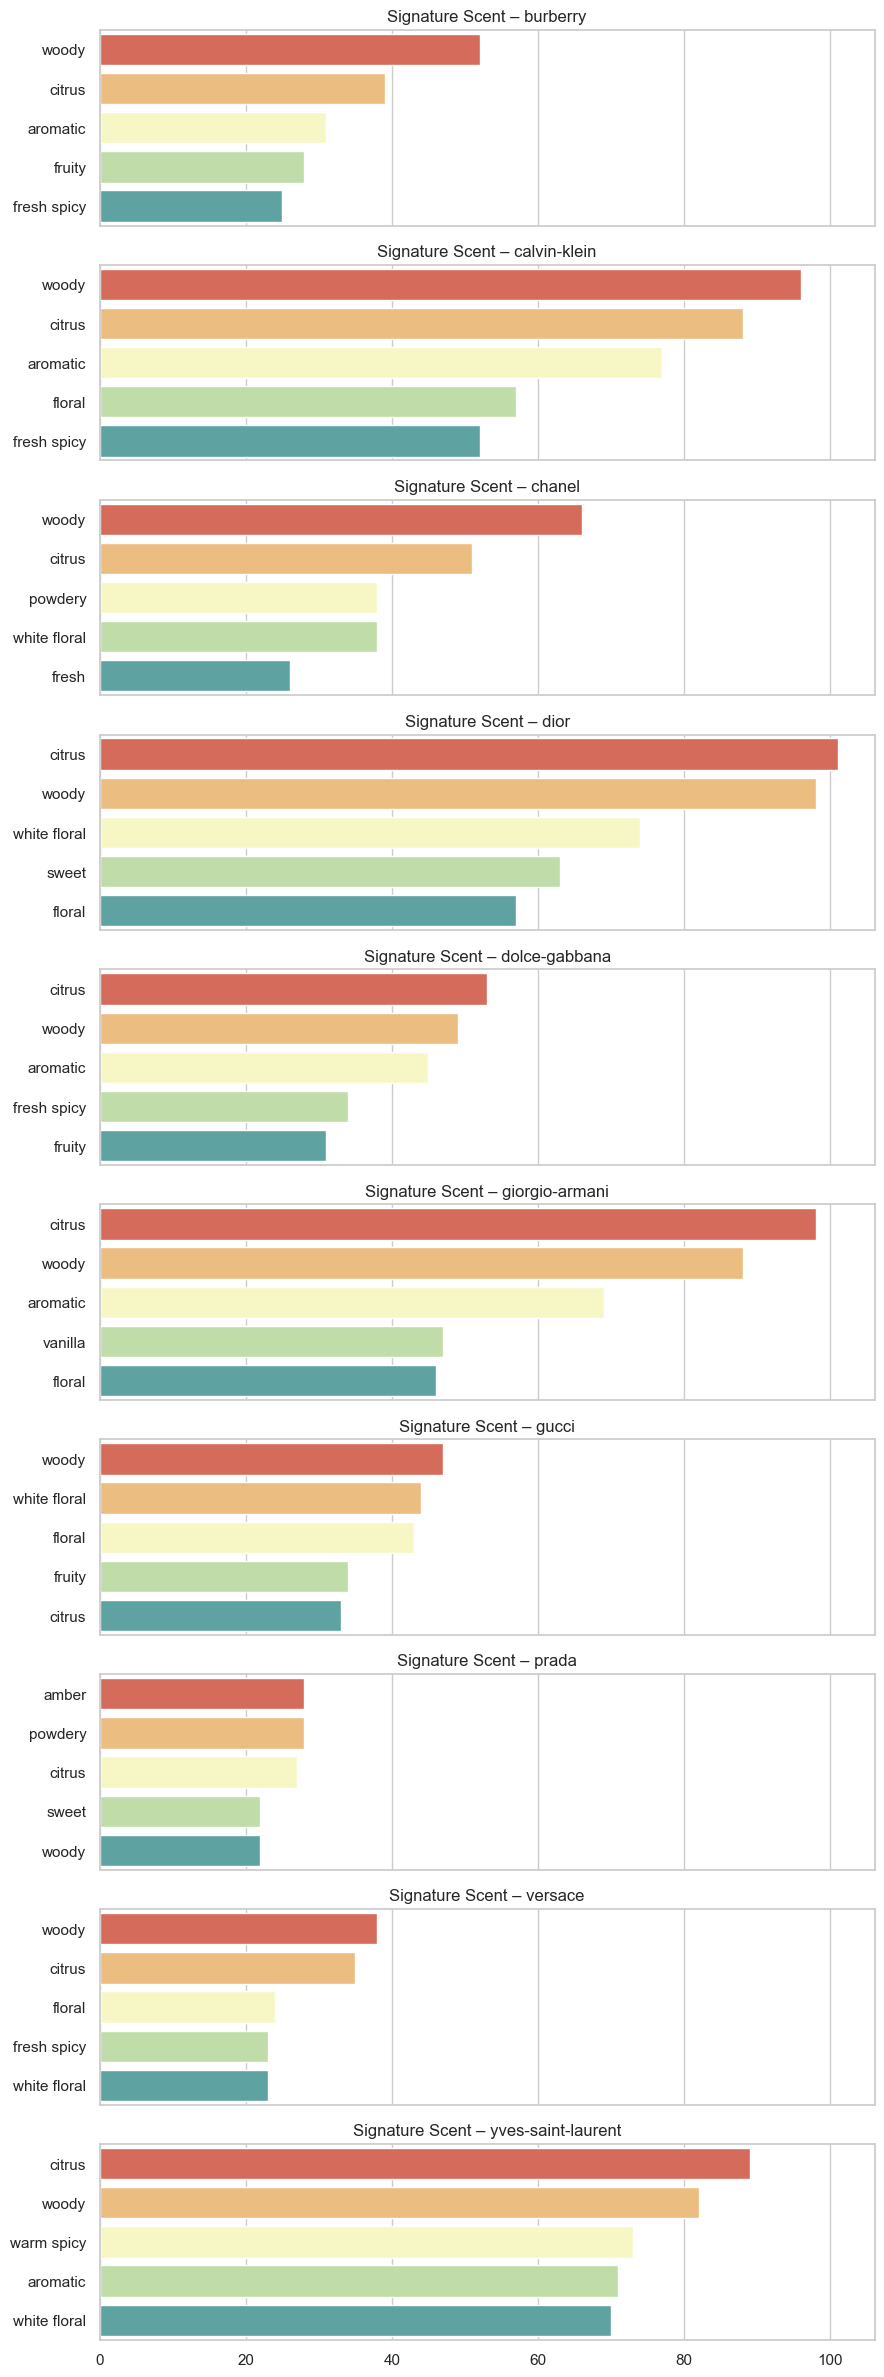

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

brands = signature_scent["Brand"].unique()
n_brands = len(brands)

fig, axes = plt.subplots(
    n_brands, 1,
    figsize=(10, 3 * n_brands),
    sharex=True
)

if n_brands == 1:
    axes = [axes]

for ax, brand in zip(axes, brands):
    temp = signature_scent[signature_scent["Brand"] == brand]

    sns.barplot(
    data=temp,
    x="count",
    y="accord",
    hue="accord",
    palette="Spectral",
    legend=False,
    ax=ax
)


    ax.set_title(f"Signature Scent – {brand}")
    ax.set_xlabel("")
    ax.set_ylabel("")

file_path = IMAGE_DIR / "signature scent bar graph.png"
plt.savefig(file_path, dpi=600, bbox_inches='tight')


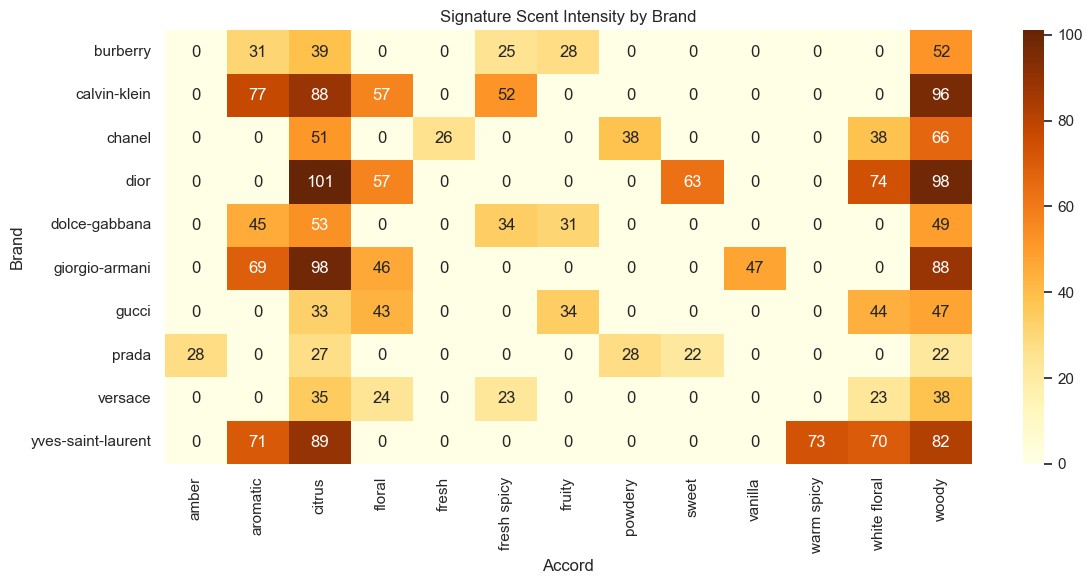

In [77]:
pivot_df = signature_scent.pivot(
    index="Brand",
    columns="accord",
    values="count"
).fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_df,
    annot=True,
    fmt=".0f",
    cmap="YlOrBr"
)

plt.title("Signature Scent Intensity by Brand")
plt.xlabel("Accord")
plt.ylabel("Brand")
plt.tight_layout()
file_path = IMAGE_DIR / "signature scent intensity.png"
plt.savefig(file_path, dpi=400, bbox_inches='tight')
plt.show()


In [82]:
import numpy as np
import matplotlib.pyplot as plt

def radar_chart_brand(df, brand):
    temp = df[df["Brand"] == brand]

    labels = temp["accord"].tolist()
    values = temp["count"].tolist()

    # Close the loop
    values += values[:1]
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    # Warna "perfume vibes"
    line_color = '#C71585'      # mediumvioletred
    fill_color = '#E6CCFF'      # soft lavender
    marker_color = '#FFB6C1'    # light pink

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Plot line
    ax.plot(angles, values, color=line_color, linewidth=2, linestyle='solid', marker='o', markersize=6, markerfacecolor=marker_color)
    # Fill area
    ax.fill(angles, values, color=fill_color, alpha=0.25)

    ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=10, color='darkslategray')
    ax.set_title(f"Signature Scent Radar – {brand}", pad=20, fontsize=14, color='purple')

    ax.set_rlabel_position(0)
    ax.tick_params(axis="y", labelsize=8, colors='dimgray')

    plt.tight_layout()
    plt.savefig(
        IMAGE_DIR / f"{brand.lower().replace(' ', '_')}_radar.png",
        dpi=300,
        bbox_inches="tight"
    )
    plt.show()


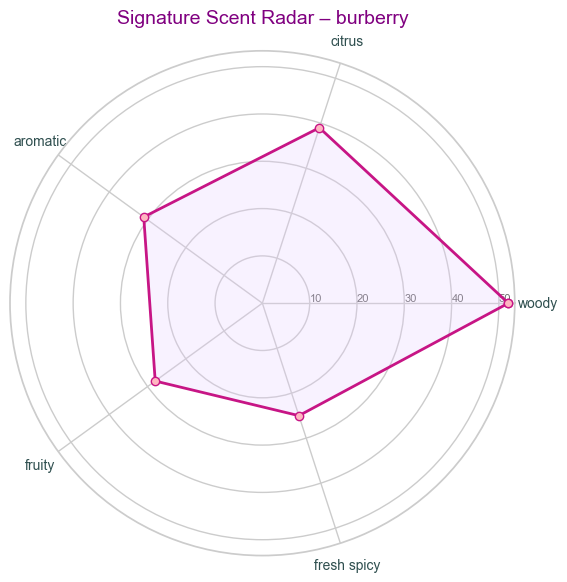

In [83]:
radar_chart_brand(signature_scent, "burberry")

### Burberry — Refined, Fresh, Woody

Dominant Accords: Woody, Citrus, Aromatic

Brand Positioning:
Burberry embodies a clean, refined, and understated character. The woody base, enhanced by hints of citrus and aromatic notes, creates a polished and versatile scent—perfect for everyday wear and professional settings.

🎯 Target Impression: Effortless elegance with a touch of British classic charm

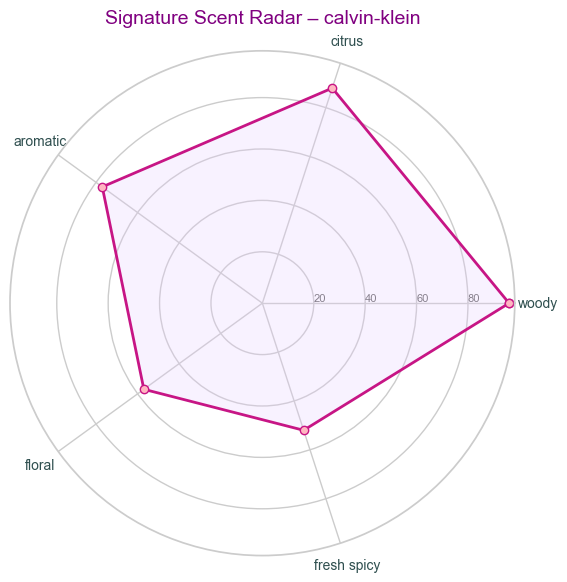

In [84]:
radar_chart_brand(signature_scent, "calvin-klein")

### Calvin Klein — Fresh & Minimalist

Dominant Accords: Woody, Citrus, Aromatic, Floral

Brand Positioning:
Calvin Klein excels in fresh–woody compositions, lightly balanced with floral touches. This scent profile reflects a minimalist, modern, and unisex-friendly identity, perfectly aligned with the brand’s clean and contemporary image.

🎯 Target Impression: Modern simplicity with broad, universal appeal

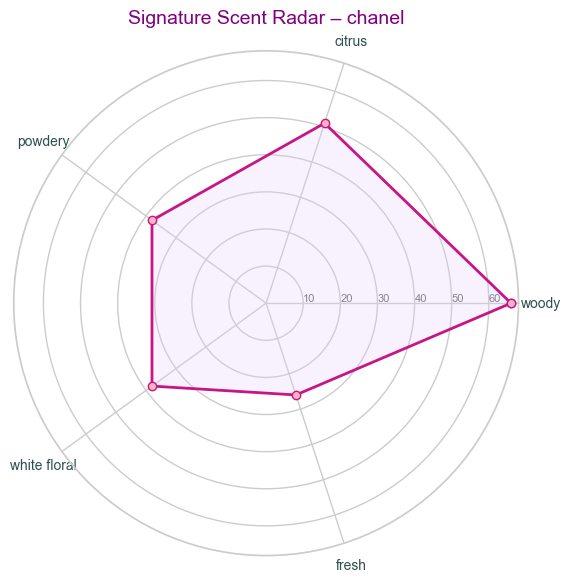

In [85]:
radar_chart_brand(signature_scent, "chanel")

### Chanel — Elegant & Aromatic

Dominant Accords: Floral, Woody, Aromatic

Brand Positioning:
Chanel fragrances are synonymous with sophistication. By combining floral elegance with woody and aromatic undertones, the brand delivers timeless, polished scents suitable for those who appreciate classic refinement.

🎯 Target Impression: Timeless elegance, refined sophistication

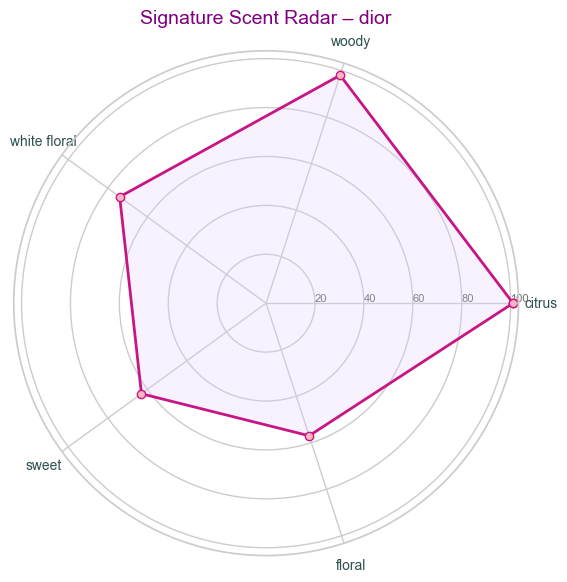

In [86]:
radar_chart_brand(signature_scent, "dior")

### Dior — Bold Citrus & Woody

Dominant Accords: Citrus, Woody, White Floral, Sweet

Brand Positioning:
Dior stands out with a dominant citrus freshness, layered with rich woody and floral notes. This bold and expressive character positions the brand as confident and charismatic, leaving a high-impact impression with every wear.

🎯 Target Impression: Confident, charismatic, and premium

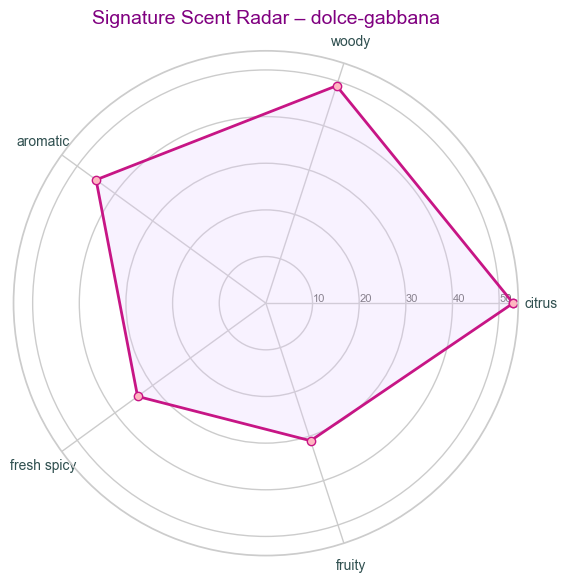

In [87]:
radar_chart_brand(signature_scent, "dolce-gabbana")

### Dolce & Gabbana — Mediterranean Fresh

Dominant Accords: Citrus, Woody, Aromatic

Brand Positioning:
D&G highlights citrus and aromatic notes as its signature, crafting a sunny, fresh, and subtly sensual fragrance. This scent profile reflects a Mediterranean-inspired, lifestyle-oriented identity, evoking warmth, vibrancy, and effortless elegance.

🎯 Target Impression: Vibrant, relaxed, and Mediterranean lifestyle

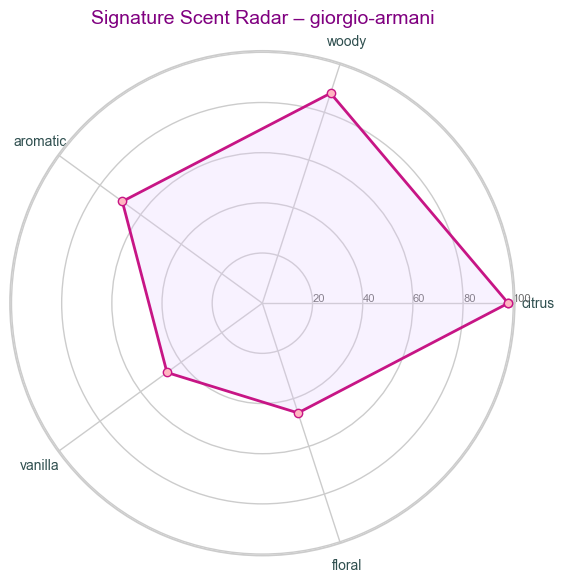

In [88]:
radar_chart_brand(signature_scent, "giorgio-armani")

### Giorgio Armani — Polished Fresh & Woody

Dominant Accords: Citrus, Woody, Aromatic, Vanilla
Brand Positioning:
Armani showcases elegant citrus freshness layered with woody notes and a smooth touch of vanilla. This fragrance communicates understated luxury, mature sophistication, and a refined sense of style.

🎯 Target Impression: Quiet luxury with mature, refined elegance

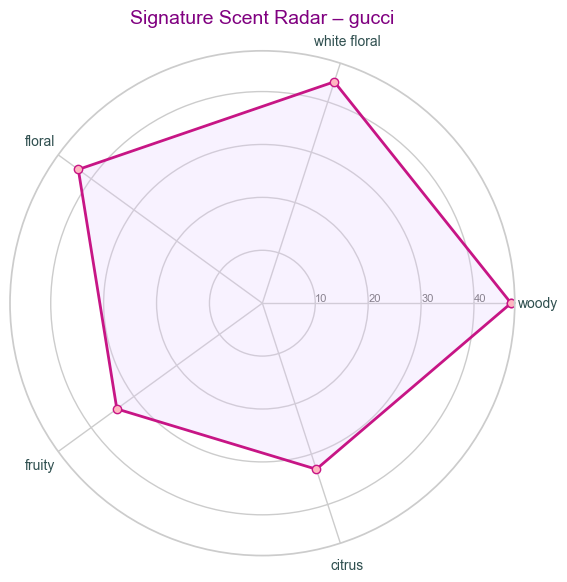

In [89]:
radar_chart_brand(signature_scent, "gucci")

### Gucci — Floral & Expressive

Dominant Accords: Woody, White Floral, Floral, Fruity

Brand Positioning:
Gucci leans toward a floral-forward profile, accented with playful fruity and woody notes. This fragrance communicates an expressive, artistic, and fashion-driven identity, standing out from mainstream fresh-masculine scents.

🎯 Target Impression: Bold femininity with creative individuality

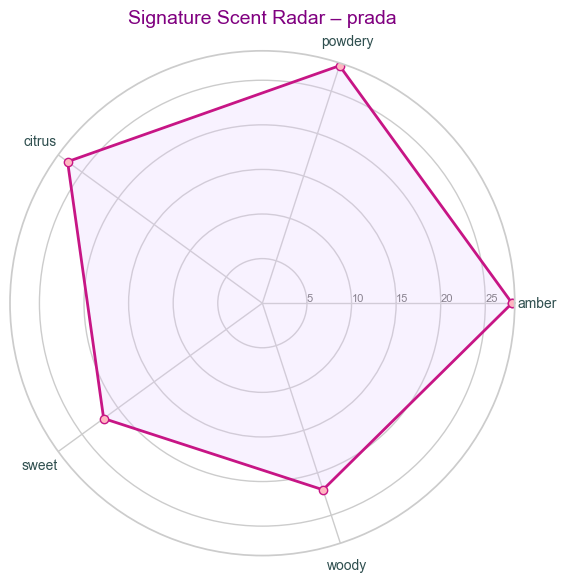

In [90]:
radar_chart_brand(signature_scent, "prada")

### Prada — Powdery & Modern Chic

Dominant Accords: Amber, Powdery, Citrus

Brand Positioning:
Prada emphasizes clean, powdery, and ambery accords that feel both sophisticated and intellectual. The scent exudes a modern, slightly abstract, and fashion-forward character, reflecting a niche-leaning designer positioning.

🎯 Target Impression: Intellectual chic with modern elegance

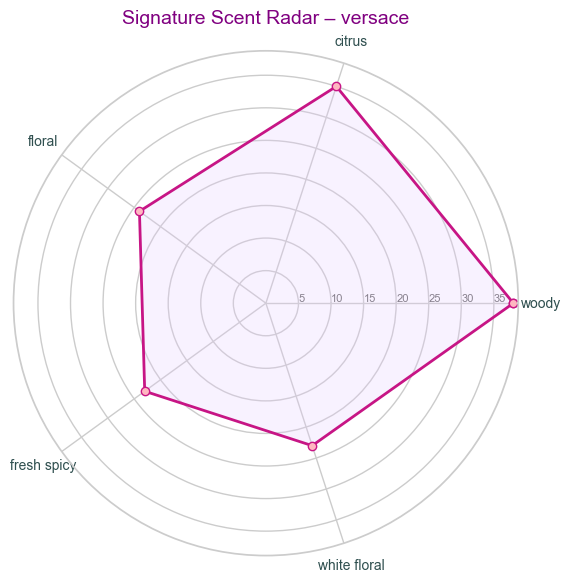

In [91]:
radar_chart_brand(signature_scent, "versace")

### Versace — Fresh & Spicy Energy

Dominant Accords: Woody, Citrus, Fresh Spicy

Brand Positioning:
Versace blends fresh citrus with woody and spicy accents, creating an energetic, bold, and sensual fragrance. It’s perfect as a statement scent, designed to make an impression in nightlife and dynamic social settings.

🎯 Target Impression: Confident, seductive, and bold lifestyle

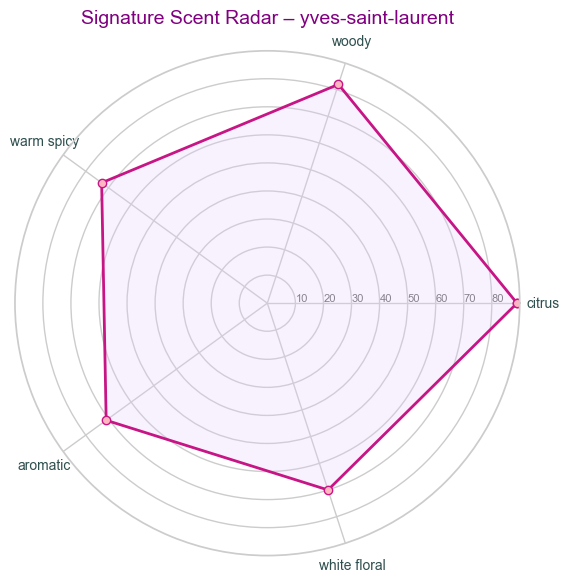

In [92]:
radar_chart_brand(signature_scent, "yves-saint-laurent")

### Yves Saint Laurent — Warm, Spicy & Modern

Dominant Accords: Citrus, Woody, Warm Spicy, Aromatic

Brand Positioning:
YSL combines fresh citrus with warm spicy and aromatic notes, creating a modern, edgy, and seductive fragrance. This scent reinforces YSL’s identity as a bold, trend-defining brand that confidently pushes boundaries.

🎯 Target Impression: Edgy elegance with modern seduction

## Conclusion & Business Insight – Signature Scent Analysis

Conclusion:
This analysis reveals that each designer brand carefully crafts its signature scent profile to reflect its unique identity. From Burberry’s refined woody elegance to Gucci’s expressive floral creativity, and from Dior’s bold citrus impact to YSL’s modern, seductive edge, the fragrance composition—top, middle, and base accords—serves as a powerful tool to communicate brand personality. Across all brands, we see clear positioning strategies: fresh and minimalistic scents for modern versatility, floral and gourmand notes for bold expression, and woody or spicy accords for luxury and sophistication.

Business Insight:
Understanding signature scent profiles provides valuable guidance for product development, marketing, and brand positioning. Brands can leverage these insights to:

Strengthen Brand Identity: Ensure new fragrances align with the established olfactory personality, reinforcing brand recognition.

Target the Right Audience: Scent profiles reflect the lifestyle and values of the intended consumer segment, from professional and understated to bold and trend-setting.

Competitive Benchmarking: By analyzing dominant accords across brands, companies can identify gaps or opportunities in the market, for example, a niche unisex scent or a bold statement fragrance.

Marketing & Storytelling: Fragrance narratives (fresh, sensual, luxurious, or expressive) can be incorporated into campaigns to resonate emotionally with consumers, increasing engagement and loyalty.

### Key Takeaway:
Signature scents are more than just fragrances—they are strategic brand assets. By analyzing and visualizing the dominant accords, brands can craft compelling products and experiences that resonate with their audience, differentiate in a crowded market, and reinforce their positioning in the luxury and designer fragrance landscape.